# Escalizador MinMaxEcaler
## Conceptos y usos
El MinMaxScaler transforma cada caracteristica individualmente escalándola al rango especificado mediante la formula

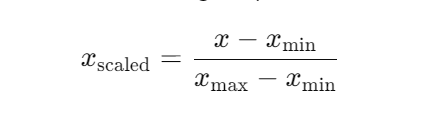 . (max - min) + min

Parametros clave:
- feature_range: Tupla(min, max) para definir el rango del escalado. Por defecto (0, 1).
- clip: Si es True,limita los valores transformados para que estén dentro del rango especificado incluso si hay valores fuera del rango en el conjunto de    datos original.
## Cuando usar MinMaxScaler ?
- Redes neuronales: Muchos algoritmos en redes neuronales funcionanmejor cuando las caracteristicas estan normalizadas entre 0 y 1.
- Algoritmos sensibles a escalas: Como KNN o métodos basados en distancias como clustering o S


Este escalador escala cada caracteristica por separado y de manera individual en el rango dado 

La transformación realizada es X_scaled = (X- X.min(axis=0))/(X.max(axis=0) - X.min(axis=0))
X_scaled = X_std*(max-min) + min.

MinMaxScaler no elimina el efecto de los valores outlier (atípicos) pero los reduce linealmente. hasta un rango fijo, donde el punto de datos mas grande aparece

## Parametros
1. clip; Está disponible en escaladores como MinMaxScaler y permite limitar los valores escalados a un rango especifico. Es util para evitar valores en    el rango escalado
2. - clip = True: Los valores se recortan (clip) al rango definido por feature_range
   - clip=False: Los valores pueden exceder el rango definido si los datos originales tienen valores extremos.




In [3]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [9]:
def scaler_minmax(data, copy=True, clip=True, feature_range=(0,1)):
    """Creamos el transformador scaler"""
    scaler = MinMaxScaler(feature_range=feature_range, copy=copy, clip=clip)      #Configuracion de la clase StandarScaler
    scaled_data = scaler.fit_transform(data)                                       # Se aplica el escalador a la data
    return scaled_data, scaler

iris = load_iris()     #Se crea una instancia de los datos de Iris
data = iris['data']
feature_names = iris['feature_names']
df = pd.DataFrame(data, columns=feature_names)

datos_escalados, scaler = scaler_minmax(df)
df_escalado= pd.DataFrame(datos_escalados, columns = feature_names)
print(df.describe())
print(df_escalado.describe())

print(scaler.inverse_transform(datos_escalados))


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            0.428704          0.440556        